### Introduction
This project is completed followed by the instruction of https://www.youtube.com/watch?v=jztwpsIzEGc
Through using image from internet, CNN model is build for classigying whether a new image is happy or sad.

### Install pacakages

In [4]:
# Install necessart pacakages
# using gpu to process image

!pip install opencv-python
#!pip list

In [6]:
!pip install tensorflow

In [8]:
!pip  list

Package                            Version
---------------------------------- -------------------
absl-py                            1.1.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             

In [124]:
import tensorflow as tf
import os # os.path for file structure; os.listdir:list anything in particular folder

In [14]:
# Avoid OOM Errors by setting gpu memory consuption growth
#OOM Error :Out-of-memory (OOM) errors take place when the Linux kernel can't provide enough memory to run all of its user-space processes
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
# limiting the gpu growth, don't use all the memory, keep it in a minimum level

In [125]:
# Load Data(image), since image will be into different version, jpg,png,weblink
import cv2 #Open Source Computer Vision Library, provide common infrastructure for computer vision applicaiton
import imghdr #Determine the type of an image
from matplotlib import pyplot as plt
import numpy as np

In [126]:
# create path for file to read
data_dir='C:/Users/Gaming/Desktop/Test Code/image_classification/ImageClassification-main'
# create list with common image type
image_exts=['jpeg','jdg','bmp','png']

In [127]:
# in my local path, there are happy and sad file exist which contain different images, insstead of loading each of them one by one, use os.lisdir is faster
print(os.listdir(data_dir))
print(os.path.join(data_dir))#join various path into 1

['happy', 'sad']
C:/Users/Gaming/Desktop/Test Code/image_classification/ImageClassification-main


In [ ]:
#imghdr.what(image_path) 
#Tests the image data contained in the file named by file(extension), and returns a string describing the image type
#imghdr.what('bass.gif')
#'gif'

In [ ]:
#cv2.imread: load image from specific path,If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.

In [128]:
#clean data before load
# we could anually remove small image < 10kb. since it is too small
# then select image only could be read and in common type
for image_class in os.listdir(data_dir): # from happy and sad this 2 path
    for image in os.listdir(os.path.join(data_dir,image_class)):# for each image in each file
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path) # if the image could be read
            tip=imghdr.what(image_path) # shows the type of image
            if tip not in image_exts: # select image only in common type
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:# if cant read image
            print('Issue with image{}'.format(image_path))

### Load Data

In [26]:
tf.keras.utils.image_dataset_from_directory??
# batch image_size into (256,256)
# it will shuffle them by itself and create a validation_split
# when data volume are high, pass keyword to change image_size or batch size

tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)

In [129]:
#keras has a data pipeline help us load data, loading data
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [28]:
# it is a generator now, we need to access the data
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [130]:
# convert it into arrary to access data in the generator
data_iterator=data.as_numpy_iterator()

In [30]:
data_iterator

In [131]:
# get another batch from the iterator, each time runing, batch will change
batch=data_iterator.next()
batch
# batch means a number of samples processed before the model is updated. 
# batch(sample selection will keep changing as we run .next())

(array([[[[200.       , 191.       , 174.       ],
          [199.22656  , 190.22656  , 173.22656  ],
          [195.71094  , 186.71094  , 169.71094  ],
          ...,
          [ 26.898438 ,  15.421875 ,  14.375    ],
          [ 33.539062 ,  22.453125 ,  20.625    ],
          [ 35.       ,  24.       ,  22.       ]],
 
         [[199.91406  , 190.91406  , 173.91406  ],
          [199.17017  , 190.17017  , 173.17017  ],
          [195.78882  , 186.78882  , 169.78882  ],
          ...,
          [ 26.472778 ,  15.03717  ,  13.859375 ],
          [ 33.180542 ,  22.10199  ,  20.109375 ],
          [ 34.65625  ,  23.65625  ,  21.484375 ]],
 
         [[199.52344  , 190.52344  , 173.52344  ],
          [198.91382  , 189.91382  , 172.91382  ],
          [196.14282  , 187.14282  , 170.14282  ],
          ...,
          [ 24.537964 ,  13.288513 ,  11.515625 ],
          [ 31.550903 ,  20.50592  ,  17.765625 ],
          [ 33.09375  ,  22.09375  ,  19.140625 ]],
 
         ...,
 
         [[ 

In [41]:
len(batch)#2
# 2 means (image,label) get loaded into memory

2

In [42]:
batch[0].shape # infor about image
#32:batch size, 256,256:shape image, 3:they are in color)

(32, 256, 256, 3)

In [43]:
batch[1]#tells labels # tell which image get assigned into which class, but to see the actual pciture, need visulization

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

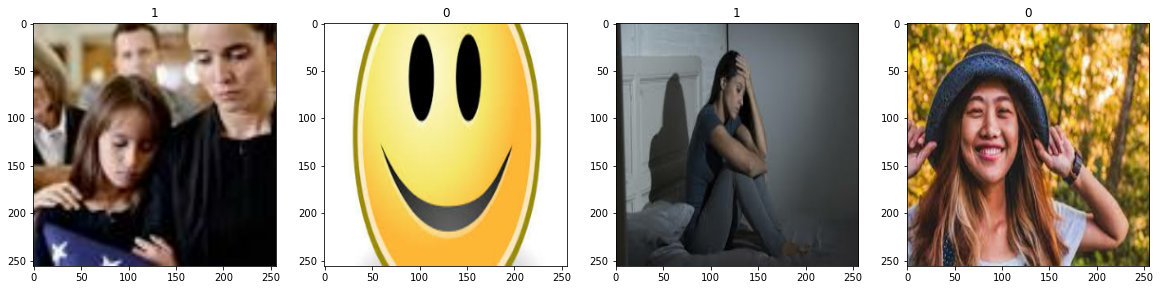

In [132]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# here is shows, sad image assigend to class 1, happy assigned to 0

### Preprocess data

In [47]:
# Batch Normalization
# want the value between 0-1
print(batch[0].min()
,batch[0].max())

0.0 255.0


### Why we need to do batch normalization?

Batch normalization was initially proposed to mitigate internal covariate shift. During the training stage of networks, as the parameters of the preceding layers change, the distribution of inputs to the current layer changes accordingly, such that the current layer needs to constantly readjust to new distributions, meaning that their learning capabilities are severely bottlenecked.
(scalling could improve training efficiency and avoid overfitting)

Detail explanations:https://towardsdatascience.com/batch-normalisation-explained-5f4bd9de5feb

In [48]:
# Scalling the data
#scaled=batch[0]/batch[0].max() we can't use the straight forward method is becuase that means we need to scale each batch every time we we load it
# instead of adjusting batch, we could scaling the data when we first load it
# under keras, max is usually 255

#### Scalling the data

In [133]:
data=data.map(lambda x,y:(x/int(batch[0].max()),y)) 
# allow scalling get perform in the  data pipeline, only need to scale once

In [ ]:
# if after scalling the max is too small(close to 0),may mean they are not colortful or bright

In [51]:
# rather than selecting a batch, we could convert the data into nparray and access directly
scalled_iterator=data.as_numpy_iterator()

In [52]:
batch=scalled_iterator.next()

In [53]:
batch[0].max()# tells us scalling is successful, now image is between 0 to 1

1.0

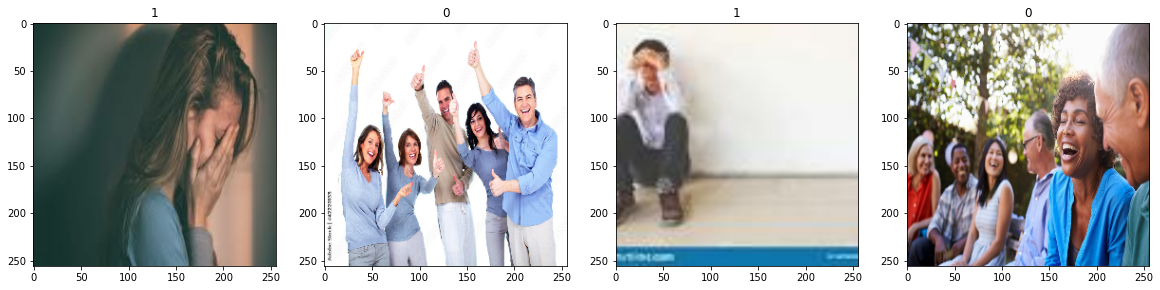

In [55]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # no need to convert into int, since they are 0 to 1
    ax[idx].title.set_text(batch[1][idx])
# here is shows, sad image assigend to class 1, happy assigned to 0

### Spliting data

In [134]:
# train, test split using tf.pipeline funciton
# need to shuffle before split, our data get shuffled already when loaded
train,val,test=data.take(7),data.skip(7).take(2),data.skip(9).take(1)
#take define how many data into speicific partiion,skip
# validation dataset use for tuning during training
# after model, use test to see the performance

### Deep Learning Model

In [135]:
# import models and layers
#sequential works well when output and input are 1, if is multiple input should use other funcitonal models
from tensorflow.keras.models import Sequential # quick and easy
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#Conv2D 2D Convolutional layer
#MaxPooing2D Condensing layer (generate features)
#Dense fully connected layer
# flatten convert later into dense could process
# Dropout for regulization
# Detailed explanations on each layers and how CNN works: https://www.youtube.com/watch?v=HGwBXDKFk9I

In [136]:
# set up model
model=Sequential()

In [69]:
Sequential??

In [137]:
# add up CNN layers
model.add(Conv2D(16,(3,3), 1, activation='relu',input_shape=(256,256,3)))# add filter and feature
model.add(MaxPooling2D()) # condense information, by default(2x2)size

model.add(Conv2D(32,(3,3),1, activation='relu'))# add filter and feature
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))# add filter and feature
model.add(MaxPooling2D())

#flatten layer
model.add(Flatten())

# result layer
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))# classfy into either 1 or 0

In [73]:
#conv2D is the first layer, 16 filters(n_filters), filter size is (3x3),(Strive) move 1 pixel each time
# activation function relu: convert negative to 0, positive remain not change. allow non-linear patterns
#sigmoid is also common when we want to predict the probability as an output.

The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.

We use the ‘add()’ function to add layers to our model.

Our first 3 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

16 in the first layer, 32 in the second layer and 16 in the third layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset. In our case, 16 and 32 work well, so we will stick with this for now. Those layers are connected to eachother

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.

In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.

‘Dense’ is the layer type we will use in for our output layer.

In [138]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
# optimizer,loss function in this case is adjusted by binary output,metrics could also be customized, accuracy here tells how well the model do classfication

#### Optimizers
through applying different algorithm, optimizers shape the model into its most accurate form by playing with model weights. The loss function just tells the optimizer when it’s moving in the right or wrong direction.

Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.
https://analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [77]:
# 30x30x16=14400 in flattern
#257 also contains a bias term

### Train model

In [139]:
logdir='C:/Users/Gaming/Desktop/Test Code/image_classification/logs'


In [140]:
# create log information when model get trained could track model's performance when changing different parameters
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
# save model at a particular checkpoint

Callback to save the Keras model or model weights at some frequency.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [141]:
# train models
#epochs: number of time go through the entire data set
CNN=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 0.7627 - accuracy: 0.5357 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6695 - accuracy: 0.6116 - val_loss: 0.6046 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.5626 - accuracy: 0.7366 - val_loss: 0.4035 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.4475 - accuracy: 0.7902 - val_loss: 0.4268 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.3624 - accuracy: 0.8259 - val_loss: 0.2543 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.2420 - accuracy: 0.9375 - val_loss: 0.1219 - val_accuracy: 0.9844
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.1781 - accuracy: 0.9375 - val_loss: 0.2616 - val_accuracy: 0.8750
Epoch 8/20
7/7 [====================

In [81]:
CNN.history # tells loss, accuracy information

{'loss': [1.1078970432281494,
  0.6360834240913391,
  0.5915105938911438,
  0.5198153257369995,
  0.41861528158187866,
  0.3500559628009796,
  0.26727262139320374,
  0.15822963416576385,
  0.11498145014047623,
  0.07674620300531387,
  0.06936340034008026,
  0.07442931830883026,
  0.05905567482113838,
  0.046227455139160156,
  0.034329064190387726,
  0.016852352768182755,
  0.020775679498910904,
  0.013521905057132244,
  0.014755976386368275,
  0.012364877387881279],
 'accuracy': [0.5580357313156128,
  0.6205357313156128,
  0.7142857313156128,
  0.7767857313156128,
  0.8348214030265808,
  0.8571428656578064,
  0.90625,
  0.9642857313156128,
  0.96875,
  0.9821428656578064,
  0.9866071343421936,
  0.9821428656578064,
  0.9866071343421936,
  0.9866071343421936,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9910714030265808,
  0.9955357313156128],
 'val_loss': [0.6324198842048645,
  0.5778862833976746,
  0.5086488723754883,
  0.4614080488681793

### Plot Performance

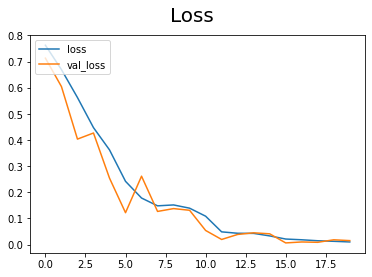

In [142]:
fig=plt.figure()
plt.plot(CNN.history['loss'],label='loss')
plt.plot(CNN.history['val_loss'],label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

if val_loss is not decreasing, overfitting appear, may need regulization
if loss not decreasing, need to check train data has bias, not able to learn, maybe change model or adjust data type


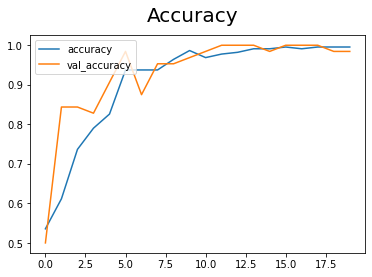

In [143]:
fig=plt.figure()
plt.plot(CNN.history['accuracy'],label='accuracy')
plt.plot(CNN.history['val_accuracy'],label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Evaluate Model

In [88]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [144]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)


1/1 [==============================] - 0s 144ms/step


In [145]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accurancy:{acc.result()}')

Precision:1.0,Recall:1.0, Accurancy:1.0


### Test a new picture

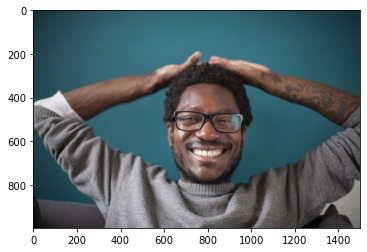

In [146]:
test_path='C:/Users/Gaming/Desktop/test1.jpg'
img=cv2.imread(test_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # convert into correct color
plt.show()

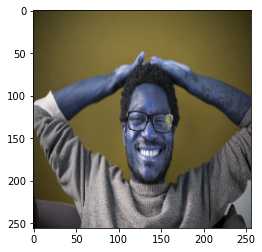

In [147]:
# scale data into correct size that model could process
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
resize.shape

TensorShape([256, 256, 3])

In [118]:
# since CNN expect batch of images not just 1, add 1 more dimension
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [148]:
yhat=model.predict(np.expand_dims(resize/255,0))
# applying data after scaling

1/1 [==============================] - 0s 22ms/step


In [150]:
if yhat <=0.5:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


### Save model

In [151]:
from tensorflow.keras.models import load_model

In [153]:
model_path='C:/Users/Gaming/Desktop/Test Code/image_classification/models'
model.save(os.path.join(model_path,'CNN-sentimental model.h5'))

In [154]:
CNN_test=load_model(os.path.join(model_path,'CNN-sentimental model.h5'))

In [155]:
yhat=CNN_test.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 83ms/step


In [156]:
if yhat <=0.5:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy
